 # [Module 2.5] AutoGluon 훈련 및 추론

이 노트북은 기본으로 AutoGluon과 동일한 작업을 합니다.
- 데이터 로딩
- AutoGluon 데이터 타입으로 변경
- AutoGluon 훈련
- 테스트 데이터 로딩 및 추론
- 모델 평가
- 피쳐 Importance 생성

In [1]:
import pandas as pd

In [2]:
%store -r te_auto_train_file
%store -r te_auto_test_file

In [3]:
te_auto_train_file

'preproc_data/fe/te_auto/train.csv'

## 데이터 로딩

In [4]:
train_pd = pd.read_csv(te_auto_train_file)
test_pd = pd.read_csv(te_auto_test_file)

In [5]:
print("auto_train_file: ", train_pd.shape)
print("auto_train_file: ", test_pd.shape)

auto_train_file:  (53740, 19)
auto_train_file:  (13436, 19)


In [6]:
from IPython.display import display as dp
dp(train_pd.head(2))
dp(test_pd.head(2))

,classes,price,freight_value,product_weight_g,product_volume,order_weekday,order_day,order_month,te_product_id_mean_smoothed,te_product_category_name_english_mean_smoothed,te_seller_state_mean_smoothed,te_seller_city_mean_smoothed,te_seller_zip_code_prefix_mean_smoothed,te_customer_seller_city_mean_smoothed,te_customer_seller_state_mean_smoothed,te_customer_seller_zip_code_prefix_mean_smoothed,te_customer_city_mean_smoothed,te_customer_state_mean_smoothed,te_customer_zip_code_prefix_mean_smoothed
0,3,29.99,10.96,9000.0,2640.0,1,4,10,2.169916,2.634373,2.081289,1.79693,1.701281,2.192347,1.633632,2.169544,2.273400,1.769943,2.201493
1,2,23.90,26.82,1500.0,14625.0,1,4,10,2.191720,2.217699,2.097592,2.21091,2.150079,2.194351,3.143455,2.205518,2.208892,3.195302,2.186005


,classes,price,freight_value,product_weight_g,product_volume,order_weekday,order_day,order_month,te_product_id_mean_smoothed,te_product_category_name_english_mean_smoothed,te_seller_state_mean_smoothed,te_seller_city_mean_smoothed,te_seller_zip_code_prefix_mean_smoothed,te_customer_seller_city_mean_smoothed,te_customer_seller_state_mean_smoothed,te_customer_seller_zip_code_prefix_mean_smoothed,te_customer_city_mean_smoothed,te_customer_state_mean_smoothed,te_customer_zip_code_prefix_mean_smoothed
0,3,105.00,23.89,1000.0,7632.0,1,19,6,2.383450,2.248060,2.139111,2.071608,2.670790,2.215037,2.208833,2.192865,2.584195,2.652646,2.177167
1,0,99.97,15.80,650.0,9600.0,1,19,6,2.193994,2.039612,2.350234,1.957532,2.155151,2.150895,2.239534,2.174192,1.625256,1.816853,2.202125


In [7]:
import autogluon.core as ag
from autogluon.tabular import TabularPrediction as task

## 오토글루온 데이터 타입으로 변경

In [8]:
train_data = task.Dataset(file_path=te_auto_train_file)
subsample_size = train_data.shape[0]
# subsample_size = 500  # subsample subset of data for faster demo, try setting this to much larger values
train_data = train_data.sample(n=subsample_size, random_state=0)
print(train_data.head())

       classes   price  freight_value  product_weight_g  product_volume  \
588          2   59.99          18.00             525.0          9280.0   
45386        3  120.00          18.72            1300.0          4864.0   
9427         3  189.99          23.91           12675.0         94080.0   
46834        2   49.99          18.23             500.0          6400.0   
2383         3  174.90          16.92             375.0         15428.0   

       order_weekday  order_day  order_month  te_product_id_mean_smoothed  \
588                0         30            1                     2.151291   
45386              4         27            4                     2.205582   
9427               5         24            6                     2.184131   
46834              5          5            5                     2.189642   
2383               5         11            3                     2.144254   

       te_product_category_name_english_mean_smoothed  \
588                          

In [9]:
label_column = 'classes'
print("Summary of class variable: \n", train_data[label_column].describe())

Summary of class variable: 
 count    53740.000000
mean         2.178675
std          1.152687
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          4.000000
Name: classes, dtype: float64


## 오토글루운으로 훈련

In [10]:
%%time
dir = 'agModels-predictClass'  # specifies folder where to store trained models
time_limits = 7200 # seconds
# presets = 'best_quality'
presets = 'medium_quality_faster_train'

predictor = task.fit(train_data=train_data, label=label_column, 
                     output_directory=dir,
                     time_limits=time_limits,
                     presets=presets)



Beginning AutoGluon training ... Time limit = 7200s
AutoGluon will save models to agModels-predictClass/
AutoGluon Version:  0.0.15b20201025
Train Data Rows:    53740
Train Data Columns: 18
Preprocessing data ...
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == int, but few unique label-values observed).
	5 unique label values:  [2, 3, 1, 0, 4]
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Train Data Class Count: 5
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    64025.88 MB
	Train Data (Original)  Memory Usage: 8.17 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFea

CPU times: user 19min 14s, sys: 6min 32s, total: 25min 47s
Wall time: 2min 22s


## 테스트 데이터 로딩

In [11]:
test_data = task.Dataset(file_path=te_auto_test_file)
y_test = test_data[label_column]  # values to predict
test_data_nolab = test_data.drop(labels=[label_column],axis=1)  # delete label column to prove we're not cheating
print(test_data_nolab.head())

Loaded data from: preproc_data/fe/te_auto/test.csv | Columns = 19 / 19 | Rows = 13436 -> 13436


    price  freight_value  product_weight_g  product_volume  order_weekday  \
0  105.00          23.89            1000.0          7632.0              1   
1   99.97          15.80             650.0          9600.0              1   
2   76.99          23.34            1850.0          3000.0              1   
3   64.90          15.55             200.0          4752.0              1   
4   75.00          27.51            2550.0         31500.0              1   

   order_day  order_month  te_product_id_mean_smoothed  \
0         19            6                     2.383450   
1         19            6                     2.193994   
2         19            6                     2.182470   
3         19            6                     2.187051   
4         19            6                     2.160452   

   te_product_category_name_english_mean_smoothed  \
0                                        2.248060   
1                                        2.039612   
2                            

## 모델 예측

In [12]:
predictor = task.load(dir)  # unnecessary, just demonstrates how to load previously-trained predictor from file

prediction = predictor.predict(test_data_nolab)
print("Predictions:  ", prediction)
perf = predictor.evaluate_predictions(y_true=y_test, y_pred=prediction, auxiliary_metrics=True)

Evaluation: accuracy on test data: 0.4542274486454302
Evaluations on test data:
{
    "accuracy": 0.4542274486454302,
    "accuracy_score": 0.4542274486454302,
    "balanced_accuracy_score": 0.44270860815342533,
    "matthews_corrcoef": 0.2806382788955235
}
Detailed (per-class) classification report:
{
    "0": {
        "precision": 0.6111111111111112,
        "recall": 0.567741935483871,
        "f1-score": 0.588628762541806,
        "support": 1705
    },
    "1": {
        "precision": 0.5598705501618123,
        "recall": 0.29096588178760213,
        "f1-score": 0.3829249011857708,
        "support": 4162
    },
    "2": {
        "precision": 0.4562187276626162,
        "recall": 0.562954796030871,
        "f1-score": 0.5039976310334616,
        "support": 4535
    },
    "3": {
        "precision": 0.3584668551680804,
        "recall": 0.5262915129151291,
        "f1-score": 0.42646234348719864,
        "support": 2168
    },
    "4": {
        "precision": 0.25274725274725274,


Predictions:   [2 2 2 ... 2 0 0]


## 리더 보드 생성

In [13]:
predictor.leaderboard(test_data, silent=True)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,weighted_ensemble_k0_l1,0.454227,0.4740,4.827542,0.720873,96.091581,0.045863,0.000826,0.595873,1,True,12
1,LightGBMClassifier,0.453185,0.4716,0.020555,0.005352,0.808921,0.020555,0.005352,0.808921,0,True,8
2,CatboostClassifier,0.451920,0.4704,0.014735,0.005307,2.379270,0.014735,0.005307,2.379270,0,True,10
3,LightGBMClassifierCustom,0.451176,0.4668,0.044056,0.006113,2.301586,0.044056,0.006113,2.301586,0,True,11
4,LightGBMClassifierXT,0.449464,0.4592,0.032485,0.005741,1.018865,0.032485,0.005741,1.018865,0,True,9
5,RandomForestClassifierEntr,0.443957,0.4576,1.195717,0.337753,17.863160,1.195717,0.337753,17.863160,0,True,5
6,NeuralNetClassifier,0.441798,0.4556,0.317702,0.128106,70.085130,0.317702,0.128106,70.085130,0,True,1
7,RandomForestClassifierGini,0.440607,0.4564,0.943708,0.357505,6.559952,0.943708,0.357505,6.559952,0,True,4
8,ExtraTreesClassifierGini,0.434951,0.4436,2.146910,0.107977,1.498918,2.146910,0.107977,1.498918,0,True,6
9,ExtraTreesClassifierEntr,0.433165,0.4592,2.924675,0.107929,1.905260,2.924675,0.107929,1.905260,0,True,7


## 모델 평가

In [14]:
from sklearn.metrics import accuracy_score, f1_score
accuracy = accuracy_score(y_test, prediction)
f1_score = f1_score(y_test, prediction, average='macro')
print("accuracy: %.2f%%" % accuracy)
print("f1_score: %.2f%%" % f1_score)

accuracy: 0.45%
f1_score: 0.43%


[[ 968  394  319   21    3]
 [ 340 1211 1796  729   86]
 [ 196  358 2553 1018  410]
 [  58  155  633 1141  181]
 [  22   45  295  274  230]]


<Figure size 432x288 with 0 Axes>

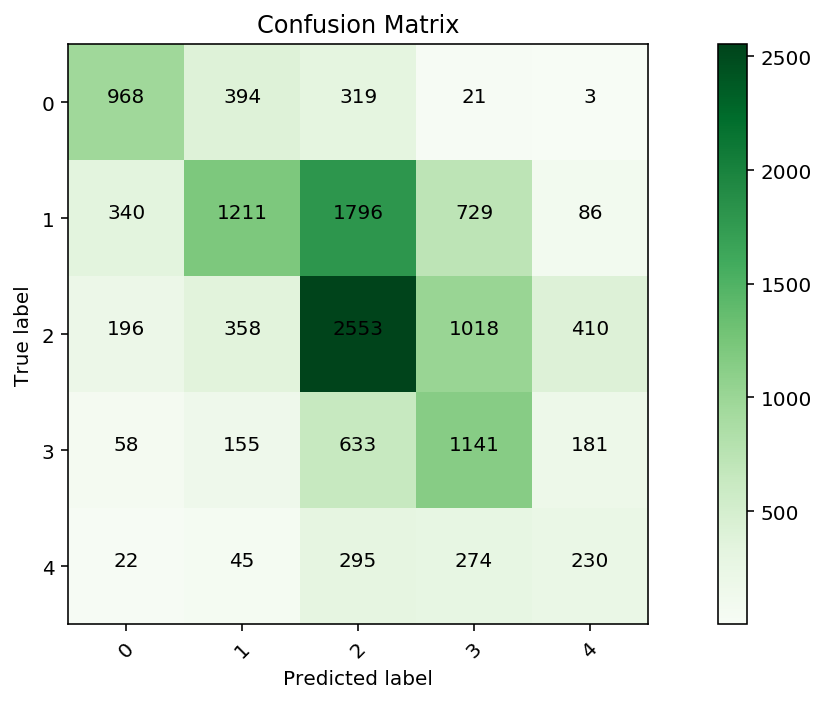

In [15]:
from utils import plot_conf_mat


from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

cm = confusion_matrix(y_true= y_test, y_pred= prediction)

plt.figure()
fig, ax = plt.subplots(figsize=(10,5))
plot_conf_mat(cm, 
              classes=['0','1', '2', '3', '4'], 
              title='Confusion Matrix')
plt.show()

## Feature Importance

Computing raw permutation importance for 18 features on weighted_ensemble_k0_l1 ...
	61.47s	= Expected runtime
	75.54s	= Actual runtime


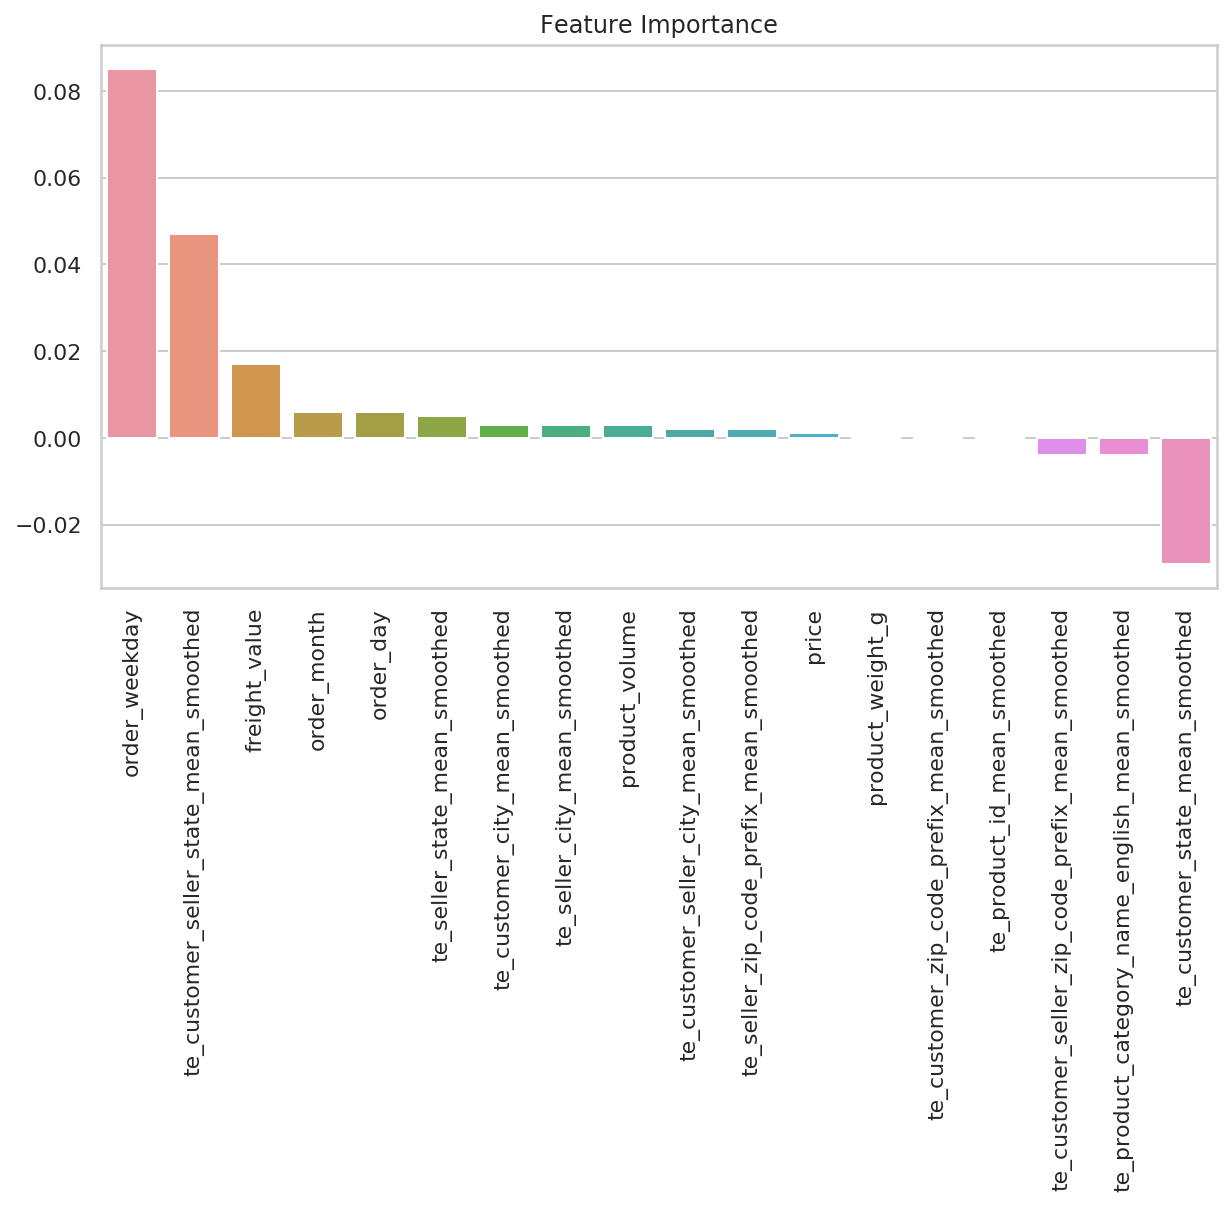

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

fea_importance = predictor.feature_importance(test_data)

f, ax = plt.subplots(figsize=(10,5))
plot = sns.barplot(x=fea_importance.index, y = fea_importance.values)
# plot = sns.barplot(x=features, y= fea_importance)
ax.set_title('Feature Importance')
plot.set_xticklabels(plot.get_xticklabels(),rotation='vertical')
plt.show()